
# Machine Learning Models Overview


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# Supervised Learning

>Supervised learning algorithms are a class of machine learning algorithms that
use previously-labeled data to learn its features, so they can classify similar but unlabeled data. Let's use an example to understand this concept better.

### Preprocessing Real Estate Data

>Let's first read in a csv file using the `pandas.read_csv` function.

- `read_csv` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
df = pd.read_csv("https://ist691.s3.amazonaws.com/real-estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


> Dropping irrelevant columns, column No and transction date. The No column represents the number of the  row which is unique for each row and transction date column which represents date and can be unique for each transaction.

- `drop` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html


In [3]:
# drop takes first argument as column name and other optional arguments.
# axis = 1 means dropping columns
# inplace = True means making changing in the existing dataframe
df.drop('No', axis = 1, inplace = True)
df.drop('X1 transaction date', axis = 1, inplace = True)

In [4]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


> Using train_test_split of sklearn's `model_selection` module to divide our into two sets, one for training and other for testing.

- `train_test_split` : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- `iloc` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [5]:
# for splitting the data into train and test
from sklearn.model_selection import train_test_split
# iloc is used to select columns and rows. The first set of arguments is for the rows and second is for the columns
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05, random_state = 0)

/Users/zanealderfer/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Linear Regression

>For linear regression, we will use real estate data for the prediction of the house prices. Data contains 6 features: transaction date, age of the house, distance to the nearest MRT station, number of convenience stores, and its latitude and longitude.

- `LinearRegression` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
# for linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# model.fit function trains the model with the training set passed
reg.fit(X_train, y_train)

LinearRegression()

>Predicting the prices of the house on test data by using the trained model. Also printing the coeficients of the linear regression model.

In [7]:
# model.predict will predict the output of the data provided as argument
lr_pred = reg.predict(X_test)
print(set(zip(reg.feature_names_in_, reg.coef_)))

{('X2 house age', -0.271222096407574), ('X4 number of convenience stores', 1.2057456235819102), ('X6 longitude', 0.035537121877957906), ('X3 distance to the nearest MRT station', -0.004095613269711012), ('X5 latitude', 239.09341586853986)}


>In a linear-regression algorithm, the goal is to minimize a cost function. A popular cost function is the mean square error (MSE), where we take the square of the difference between the expected value and the predicted result. The sum over all the input examples gives us the error of the algorithm and represents the cost function.

- `mean_squared_error` - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [8]:
# importing the mean_squared_error function
from sklearn.metrics import mean_squared_error
mean_squared_error(lr_pred, y_test)

34.009550791513384

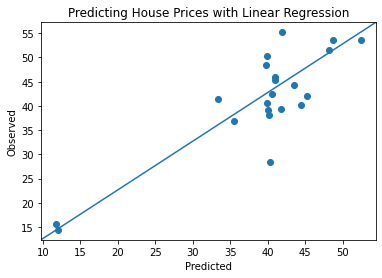

In [9]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform = ax.transAxes)

plt.scatter(lr_pred, y_test)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Predicting House Prices with Linear Regression")

plt.show()

### Preprocessing the Iris Dataset

This is perhaps the best known data set to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica

- `plot_iris_dataset` : https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

- `StandardScaler` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [10]:
# loading iris dataset from sklearn dataset class
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
# using train test split to divide the iris dataset into training and testing group
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, random_state=0)
print('Training set has {} samples and testing set has {} samples.'.format(X_train.shape[0], X_test.shape[0]))

Training set has 105 samples and testing set has 45 samples.


In [12]:
# using sklearn StandardScaler to standarize the features of training and test. It will scale our data to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

# sing StandardScaler transform method to transform data. More detail can be found in the documentation from the link above.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

- `LogisticRegression` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0).fit(X_train_std, y_train)

In [14]:
# test set predictions using LogisticRegression model
clf.predict(X_test_std)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [15]:
# actual values
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
# compare predictions to actual values for accuracy of predictions
clf.score(X_test_std, y_test)

0.9777777777777777

### Support Vector Machine

- `SVM` : https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm

In [17]:
from sklearn.svm import SVC

# using a support vector classifier (SVC) with a radial basis function kernal
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


### Decision Tree

- `DecisionTreeClassifier` : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

- `plot_tree` : https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn.tree.plot_tree

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
dt = DecisionTreeClassifier().fit(iris.data, iris.target)

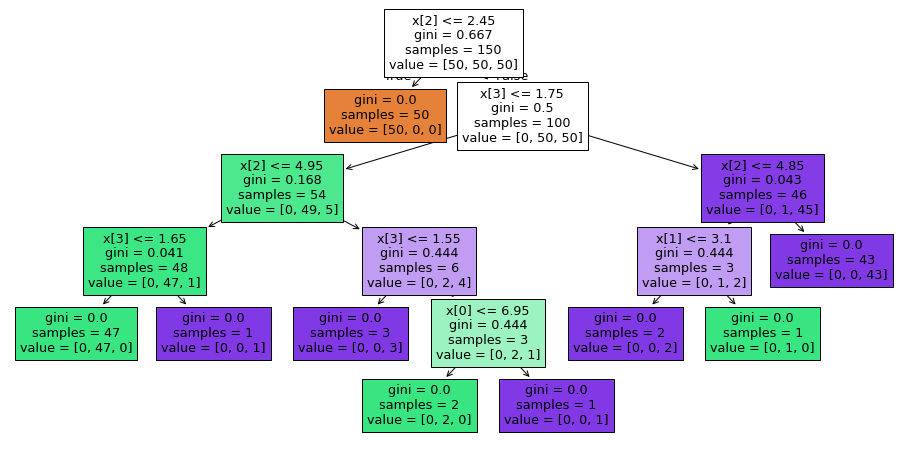

In [20]:
plt.figure(figsize = (16,8))
# plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(dt, filled = True)
# display the tree plot figure.
plt.show()

### Preprocessing Cancer Data

In [21]:
# using the pandas library to read a csv file
df = pd.read_csv("https://ist691.s3.amazonaws.com/cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
df.drop(["id"], axis = 1, inplace = True)
df.drop(["Unnamed: 32"], axis = 1, inplace = True)

In [23]:
df['diagnosis'] = [1 if i == "M" else 0 for i in df.diagnosis]

In [24]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [25]:
x = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis.values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 0)
print('Training set has {} samples and testing set has {} samples.'.format(X_train.shape[0], X_test.shape[0]))

Training set has 398 samples and testing set has 171 samples.


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Gaussian Naive Bayes

 - `GaussianNB` : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_std, y_train)

GaussianNB()

In [29]:
print("Naive Bayes score: ",nb.score(X_test_std, y_test))

Naive Bayes score:  0.9122807017543859


# Unsupervised Learning

## K-means Clutering

> The K-means clustering algorithm is an example of an iterative algorthm which tries to partition the dataset into K non-overlaping groups or clusters.

 - `KMeans` : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [30]:
from sklearn.cluster import KMeans
# for splitting the data into train and test
from sklearn.model_selection import train_test_split

In [31]:
# load the iris dataset from sklearn dataset class
from sklearn import datasets
iris = datasets.load_iris()

In [32]:
# using train test split to divide the iris dataset into training and testing group
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.3, random_state=0)
print('Training set has {} samples and testing set has {} samples.'.format(X_train.shape[0], X_test.shape[0]))

Training set has 105 samples and testing set has 45 samples.


In [33]:
# specify the number of clusters
k = 3

# make kmeans object and fit it with train data
# n_init controls the number of times the algorithm runs
kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 25).fit(X_train)

In [34]:
# make prediction on test data using trained kmeans model
y_pred = kmeans.predict(X_test)

In [35]:
# get the centers of the 3 clusters for each feature in iris
pd.DataFrame(data = kmeans.cluster_centers_,
             columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.843590,2.705128,4.341026,1.410256
1,4.994118,3.382353,1.452941,0.232353
2,6.909375,3.100000,5.728125,2.062500


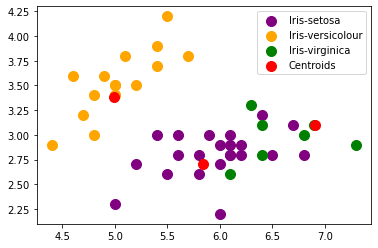

In [36]:
# create a scatter plot where our target variable is 0
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')

# create a scatter plot where our target variable is 1
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')

# create a scatter plot where our target variable is 2
plt.scatter(X_test[y_pred == 2, 0], X_test[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

## Clustering for Image Segmentation

> Now we will use Kmeans clustering with images for Image Segmentation. Image Segmentation is a task of partitioning an image into multiple segments. For this task, we will be using a simple variation of image segmentation which is color segmentation. Color segmentation will simply assign pixels to the same segment if they have a similar color.

> We will use `matplotlib.imread()` to load an image. The image is loaded as a 3D array, height, width, channel (3-channel for RGB or 4 -channel for RGB with alpha).

> Loading image into 3D array using the `imread()` function. If we look to the shape of the image, it's a 3D array. The image we loaded is a 720x1280 pixel RGB image. Therefore, the shape of the image is (720, 1280, 3).

In [37]:
from matplotlib.image import imread
%matplotlib inline

In [40]:
image = imread("/Users/zanealderfer/Downloads/colored-houses.jpeg")
image.shape

(400, 600, 3)

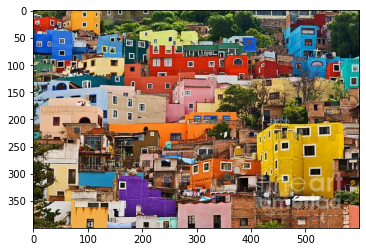

In [41]:
plt.imshow(image)

In [42]:
image.shape

(400, 600, 3)

>We will reshape the image array as a long list of RGB colors using `reshape()`.

In [43]:
x = image.reshape(-1,3)
x.shape

(240000, 3)

>After reshapping the image, we will fit it using `KMeans` for color segmentation. Here the value of K in `KMeans` will decide the number of colors in the output image. We will try 4 different variations with cluter values of 3, 4, 5 and 8.

>The algorithm will try to make K clusters of similar sizes. For example, it may try to find all shades of green and look for the mean color. Then it will replace all shades with the mean color.

In [44]:
# initilize a KMeans object with 3 clusters and fitting the object with the reshaped image
kmeans = KMeans(n_clusters = 3).fit(x)

# change the value of all the pixels with their cluster center value
segmented_img_3 = kmeans.cluster_centers_[kmeans.labels_]

# reshape the segmentated image to the original shape
segmented_img_3 = segmented_img_3.reshape(image.shape)

In [45]:
kmeans = KMeans(n_clusters = 4).fit(x)
segmented_img_4 = kmeans.cluster_centers_[kmeans.labels_]
segmented_img_4 = segmented_img_4.reshape(image.shape)

In [46]:
kmeans = KMeans(n_clusters = 5).fit(x)
segmented_img_5 = kmeans.cluster_centers_[kmeans.labels_]
segmented_img_5 = segmented_img_5.reshape(image.shape)

In [47]:
kmeans = KMeans(n_clusters = 8).fit(x)
segmented_img_6 = kmeans.cluster_centers_[kmeans.labels_]
segmented_img_6 = segmented_img_6.reshape(image.shape)

>We will now create a 2x2 grid to plot the 4 variations of color segmentation of `kmeans`.

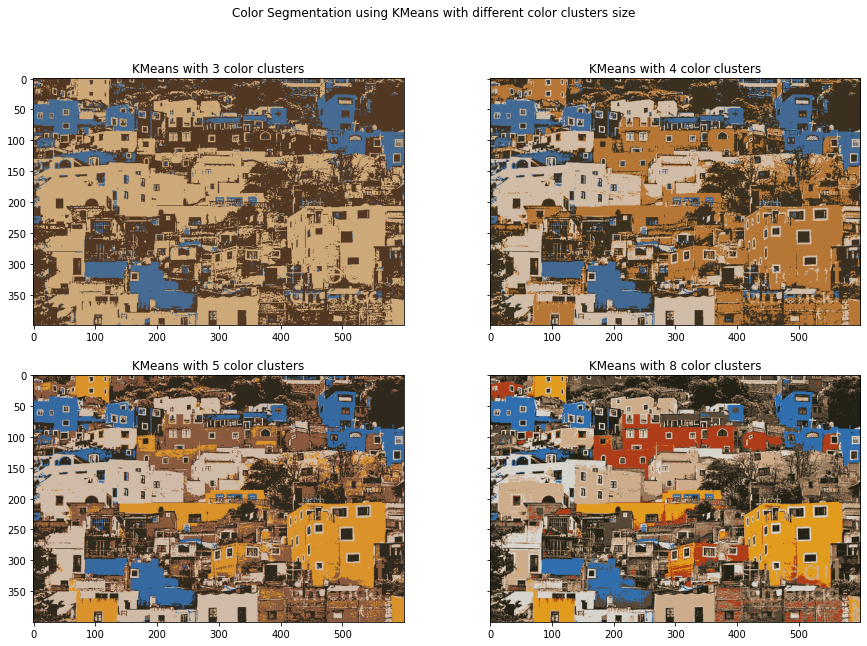

In [48]:
f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey = True, figsize=(15,10))

ax1.imshow((segmented_img_3).astype(np.uint8))
ax1.set_title("KMeans with 3 color clusters")

ax2.imshow((segmented_img_4).astype(np.uint8))
ax2.set_title("KMeans with 4 color clusters")

ax3.imshow((segmented_img_5).astype(np.uint8))
ax3.set_title("KMeans with 5 color clusters")

ax4.imshow((segmented_img_6).astype(np.uint8))
ax4.set_title("KMeans with 8 color clusters")

f.suptitle("Color Segmentation using KMeans with different color clusters size")

plt.show();

> Above is the result of color segmentation. In the first picture with cluster size 3, we notice there are only three colors, a variant of white, variant of yellow, and black. But as we increase the cluster size by 1, we see a new color blue is introduced in the output. If we look at the original image we only have 6-7 houses with different variations of blue. A mean value of all blue was calculated and all the shades of blue are replaced with the blue mean.

>As we increase the cluster size, new colors are introduced. `KMeans` tries to keep all the clusters of similar size so new colors will only be introduced when it has cluster size big enough in comparison with other color clusters.